# Cyclistic Bike Share Data Analysis
Using prevous `12 months` of collected data to analyse and provide conclusions to provide solutions for the business task

In [3]:
#installing and loading packages 
install.packages("janitor")
library(tidyverse)
library(lubridate)  
library(ggplot2)
library(RColorBrewer)
library(janitor)
library(scales)
rm(list=ls())

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
# Loading all datasets into variables

df1 <- read.csv("202106-divvy-tripdata.csv")
df2 <- read.csv("202105-divvy-tripdata.csv")
df3 <- read.csv("202104-divvy-tripdata.csv")
df4 <- read.csv("202103-divvy-tripdata.csv")
df5 <- read.csv("202102-divvy-tripdata.csv")
df6 <- read.csv("202101-divvy-tripdata.csv")
df7 <- read.csv("202012-divvy-tripdata.csv")
df8 <- read.csv("202011-divvy-tripdata.csv")
df9 <- read.csv("202010-divvy-tripdata.csv")
df10 <- read.csv("202009-divvy-tripdata.csv")
df11 <- read.csv("202008-divvy-tripdata.csv")
df12 <- read.csv("202007-divvy-tripdata.csv")

## Process (Data Cleaning)

In [ ]:
# Checking for discrepancies in structure

str(df1)
str(df2)
str(df3)
str(df4)
str(df5)
str(df6)
str(df7)
str(df8)
str(df9)
str(df10)
str(df12)

'data.frame':	729595 obs. of  13 variables:
 $ ride_id           : chr  "99FEC93BA843FB20" "06048DCFC8520CAF" "9598066F68045DF2" "B03C0FE48C412214" ...
 $ rideable_type     : chr  "electric_bike" "electric_bike" "electric_bike" "electric_bike" ...
 $ started_at        : chr  "2021-06-13 14:31:28" "2021-06-04 11:18:02" "2021-06-04 09:49:35" "2021-06-03 19:56:05" ...
 $ ended_at          : chr  "2021-06-13 14:34:11" "2021-06-04 11:24:19" "2021-06-04 09:55:34" "2021-06-03 20:21:55" ...
 $ start_station_name: chr  "" "" "" "" ...
 $ start_station_id  : chr  "" "" "" "" ...
 $ end_station_name  : chr  "" "" "" "" ...
 $ end_station_id    : chr  "" "" "" "" ...
 $ start_lat         : num  41.8 41.8 41.8 41.8 41.8 ...
 $ start_lng         : num  -87.6 -87.6 -87.6 -87.6 -87.6 ...
 $ end_lat           : num  41.8 41.8 41.8 41.8 41.8 ...
 $ end_lng           : num  -87.6 -87.6 -87.6 -87.6 -87.6 ...
 $ member_casual     : chr  "member" "member" "member" "member" ...
'data.frame':	531633 obs. of  

In [5]:
# Found discepancies in the data type of the columns "start_station_id" and "end_station_id"

df7 <- df7 %>% mutate(start_station_id = as.factor(start_station_id), end_station_id = as.factor(end_station_id))
df8 <- df8 %>% mutate(start_station_id = as.factor(start_station_id), end_station_id = as.factor(end_station_id))
df9 <- df9 %>% mutate(start_station_id = as.factor(start_station_id), end_station_id = as.factor(end_station_id))
df10 <- df10 %>% mutate(start_station_id = as.factor(start_station_id), end_station_id = as.factor(end_station_id))
df11 <- df11 %>% mutate(start_station_id = as.factor(start_station_id), end_station_id = as.factor(end_station_id))

In [6]:
# Merging all data sets

bike_rides_data <- rbind(df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12)
head(bike_rides_data)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,99FEC93BA843FB20,electric_bike,2021-06-13 14:31:28,2021-06-13 14:34:11,,,,,41.80,-87.59,41.80,-87.60,member
2,06048DCFC8520CAF,electric_bike,2021-06-04 11:18:02,2021-06-04 11:24:19,,,,,41.79,-87.59,41.80,-87.60,member
3,9598066F68045DF2,electric_bike,2021-06-04 09:49:35,2021-06-04 09:55:34,,,,,41.80,-87.60,41.79,-87.59,member
4,B03C0FE48C412214,electric_bike,2021-06-03 19:56:05,2021-06-03 20:21:55,,,,,41.78,-87.58,41.80,-87.60,member
5,B9EEA89F8FEE73B7,electric_bike,2021-06-04 14:05:51,2021-06-04 14:09:59,,,,,41.80,-87.59,41.79,-87.59,member
6,62B943CEAAA420BA,electric_bike,2021-06-03 19:32:01,2021-06-03 19:38:46,,,,,41.78,-87.58,41.78,-87.58,member


In [7]:
# Removing the columns not needed for our analysis from our data set

bike_rides_data <- bike_rides_data %>%
  select(-(start_lat:end_lng))
head(bike_rides_data)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,99FEC93BA843FB20,electric_bike,2021-06-13 14:31:28,2021-06-13 14:34:11,,,,,member
2,06048DCFC8520CAF,electric_bike,2021-06-04 11:18:02,2021-06-04 11:24:19,,,,,member
3,9598066F68045DF2,electric_bike,2021-06-04 09:49:35,2021-06-04 09:55:34,,,,,member
4,B03C0FE48C412214,electric_bike,2021-06-03 19:56:05,2021-06-03 20:21:55,,,,,member
5,B9EEA89F8FEE73B7,electric_bike,2021-06-04 14:05:51,2021-06-04 14:09:59,,,,,member
6,62B943CEAAA420BA,electric_bike,2021-06-03 19:32:01,2021-06-03 19:38:46,,,,,member


In [8]:
# Remove rows with missing values

bike_rides_data <- janitor ::remove_empty(bike_rides_data,which = c("cols"))
bike_rides_data <- janitor::remove_empty(bike_rides_data,which = c("rows"))

colSums(is.na(bike_rides_data))

ride_id      rideable_type         started_at           ended_at 
                 0                  0                  0                  0 
start_station_name   start_station_id   end_station_name     end_station_id 
                 0              83583                  0              97216 
     member_casual 
                 0

In [9]:
#  Removing rows with empty start_station_name

bike_rides_data <- bike_rides_data  %>%
                   filter(start_station_name !="")

head(bike_rides_data)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,0D904FEC5F84A538,classic_bike,2021-06-04 07:29:18,2021-06-04 07:45:34,Orleans St & Elm St,TA1306000006,Orleans St & Elm St,TA1306000006,member
2,C4185F300D6B552B,classic_bike,2021-06-23 08:39:36,2021-06-23 08:41:37,Desplaines St & Kinzie St,TA1306000003,Kingsbury St & Kinzie St,KA1503000043,member
3,60F97090AC85F55E,classic_bike,2021-06-27 12:26:58,2021-06-27 12:34:45,Clark St & Grace St,TA1307000127,Clark St & Leland Ave,TA1309000014,member
4,FBC7B1F0160AA304,classic_bike,2021-06-01 12:30:24,2021-06-01 12:33:02,Kingsbury St & Kinzie St,KA1503000043,Desplaines St & Kinzie St,TA1306000003,member
5,37A52001AEEFA4E5,classic_bike,2021-06-01 11:32:17,2021-06-01 11:34:43,Desplaines St & Kinzie St,TA1306000003,Kingsbury St & Kinzie St,KA1503000043,member
6,E49E5426F0B74023,classic_bike,2021-06-17 17:55:12,2021-06-17 17:58:50,Kingsbury St & Kinzie St,KA1503000043,Desplaines St & Kinzie St,TA1306000003,member


In [10]:
## Converting given timestamp data to its respective formats

bike_rides_data$Ymd <- as.Date(bike_rides_data$started_at)
bike_rides_data$started_at <- lubridate::ymd_hms(bike_rides_data$started_at)
bike_rides_data$ended_at <- lubridate::ymd_hms(bike_rides_data$ended_at)
bike_rides_data$start_hour <- lubridate::hour(bike_rides_data$started_at)
bike_rides_data$end_hour <- lubridate::hour(bike_rides_data$ended_at)

head(bike_rides_data)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,Ymd,start_hour,end_hour
,<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<int>,<int>
1,0D904FEC5F84A538,classic_bike,2021-06-04 07:29:18,2021-06-04 07:45:34,Orleans St & Elm St,TA1306000006,Orleans St & Elm St,TA1306000006,member,2021-06-04,7,7
2,C4185F300D6B552B,classic_bike,2021-06-23 08:39:36,2021-06-23 08:41:37,Desplaines St & Kinzie St,TA1306000003,Kingsbury St & Kinzie St,KA1503000043,member,2021-06-23,8,8
3,60F97090AC85F55E,classic_bike,2021-06-27 12:26:58,2021-06-27 12:34:45,Clark St & Grace St,TA1307000127,Clark St & Leland Ave,TA1309000014,member,2021-06-27,12,12
4,FBC7B1F0160AA304,classic_bike,2021-06-01 12:30:24,2021-06-01 12:33:02,Kingsbury St & Kinzie St,KA1503000043,Desplaines St & Kinzie St,TA1306000003,member,2021-06-01,12,12
5,37A52001AEEFA4E5,classic_bike,2021-06-01 11:32:17,2021-06-01 11:34:43,Desplaines St & Kinzie St,TA1306000003,Kingsbury St & Kinzie St,KA1503000043,member,2021-06-01,11,11
6,E49E5426F0B74023,classic_bike,2021-06-17 17:55:12,2021-06-17 17:58:50,Kingsbury St & Kinzie St,KA1503000043,Desplaines St & Kinzie St,TA1306000003,member,2021-06-17,17,17


In [11]:
# Adding columns with the duration of the rides

bike_rides_data$Hours <- difftime(bike_rides_data$ended_at,bike_rides_data$started_at,units = c("hours"))
bike_rides_data$Minutes <- difftime(bike_rides_data$ended_at,bike_rides_data$started_at,units = c("mins"))

head(bike_rides_data)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,Ymd,start_hour,end_hour,Hours,Minutes
,<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<int>,<int>,<drtn>,<drtn>
1,0D904FEC5F84A538,classic_bike,2021-06-04 07:29:18,2021-06-04 07:45:34,Orleans St & Elm St,TA1306000006,Orleans St & Elm St,TA1306000006,member,2021-06-04,7,7,0.27111111 hours,16.266667 mins
2,C4185F300D6B552B,classic_bike,2021-06-23 08:39:36,2021-06-23 08:41:37,Desplaines St & Kinzie St,TA1306000003,Kingsbury St & Kinzie St,KA1503000043,member,2021-06-23,8,8,0.03361111 hours,2.016667 mins
3,60F97090AC85F55E,classic_bike,2021-06-27 12:26:58,2021-06-27 12:34:45,Clark St & Grace St,TA1307000127,Clark St & Leland Ave,TA1309000014,member,2021-06-27,12,12,0.12972222 hours,7.783333 mins
4,FBC7B1F0160AA304,classic_bike,2021-06-01 12:30:24,2021-06-01 12:33:02,Kingsbury St & Kinzie St,KA1503000043,Desplaines St & Kinzie St,TA1306000003,member,2021-06-01,12,12,0.04388889 hours,2.633333 mins
5,37A52001AEEFA4E5,classic_bike,2021-06-01 11:32:17,2021-06-01 11:34:43,Desplaines St & Kinzie St,TA1306000003,Kingsbury St & Kinzie St,KA1503000043,member,2021-06-01,11,11,0.04055556 hours,2.433333 mins
6,E49E5426F0B74023,classic_bike,2021-06-17 17:55:12,2021-06-17 17:58:50,Kingsbury St & Kinzie St,KA1503000043,Desplaines St & Kinzie St,TA1306000003,member,2021-06-17,17,17,0.06055556 hours,3.633333 mins


In [13]:
# data with Differnce in minutes totaling to less than 0 will be removed

bike_rides_data <- bike_rides_data %>% filter(Minutes >0)

head(bike_rides_data)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,Ymd,start_hour,end_hour,Hours,Minutes,days_of_week
,<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<int>,<int>,<drtn>,<drtn>,<ord>
1,0D904FEC5F84A538,classic_bike,2021-06-04 07:29:18,2021-06-04 07:45:34,Orleans St & Elm St,TA1306000006,Orleans St & Elm St,TA1306000006,member,2021-06-04,7,7,0.27111111 hours,16.266667 mins,Fri
2,C4185F300D6B552B,classic_bike,2021-06-23 08:39:36,2021-06-23 08:41:37,Desplaines St & Kinzie St,TA1306000003,Kingsbury St & Kinzie St,KA1503000043,member,2021-06-23,8,8,0.03361111 hours,2.016667 mins,Wed
3,60F97090AC85F55E,classic_bike,2021-06-27 12:26:58,2021-06-27 12:34:45,Clark St & Grace St,TA1307000127,Clark St & Leland Ave,TA1309000014,member,2021-06-27,12,12,0.12972222 hours,7.783333 mins,Sun
4,FBC7B1F0160AA304,classic_bike,2021-06-01 12:30:24,2021-06-01 12:33:02,Kingsbury St & Kinzie St,KA1503000043,Desplaines St & Kinzie St,TA1306000003,member,2021-06-01,12,12,0.04388889 hours,2.633333 mins,Tue
5,37A52001AEEFA4E5,classic_bike,2021-06-01 11:32:17,2021-06-01 11:34:43,Desplaines St & Kinzie St,TA1306000003,Kingsbury St & Kinzie St,KA1503000043,member,2021-06-01,11,11,0.04055556 hours,2.433333 mins,Tue
6,E49E5426F0B74023,classic_bike,2021-06-17 17:55:12,2021-06-17 17:58:50,Kingsbury St & Kinzie St,KA1503000043,Desplaines St & Kinzie St,TA1306000003,member,2021-06-17,17,17,0.06055556 hours,3.633333 mins,Thu


In [14]:
# Adding a column named days_of_week to know the weekly rides
bike_rides_data$days_of_week <- wday(bike_rides_data$started_at, label = TRUE)

head(bike_rides_data)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,Ymd,start_hour,end_hour,Hours,Minutes,days_of_week
,<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<int>,<int>,<drtn>,<drtn>,<ord>
1,0D904FEC5F84A538,classic_bike,2021-06-04 07:29:18,2021-06-04 07:45:34,Orleans St & Elm St,TA1306000006,Orleans St & Elm St,TA1306000006,member,2021-06-04,7,7,0.27111111 hours,16.266667 mins,Fri
2,C4185F300D6B552B,classic_bike,2021-06-23 08:39:36,2021-06-23 08:41:37,Desplaines St & Kinzie St,TA1306000003,Kingsbury St & Kinzie St,KA1503000043,member,2021-06-23,8,8,0.03361111 hours,2.016667 mins,Wed
3,60F97090AC85F55E,classic_bike,2021-06-27 12:26:58,2021-06-27 12:34:45,Clark St & Grace St,TA1307000127,Clark St & Leland Ave,TA1309000014,member,2021-06-27,12,12,0.12972222 hours,7.783333 mins,Sun
4,FBC7B1F0160AA304,classic_bike,2021-06-01 12:30:24,2021-06-01 12:33:02,Kingsbury St & Kinzie St,KA1503000043,Desplaines St & Kinzie St,TA1306000003,member,2021-06-01,12,12,0.04388889 hours,2.633333 mins,Tue
5,37A52001AEEFA4E5,classic_bike,2021-06-01 11:32:17,2021-06-01 11:34:43,Desplaines St & Kinzie St,TA1306000003,Kingsbury St & Kinzie St,KA1503000043,member,2021-06-01,11,11,0.04055556 hours,2.433333 mins,Tue
6,E49E5426F0B74023,classic_bike,2021-06-17 17:55:12,2021-06-17 17:58:50,Kingsbury St & Kinzie St,KA1503000043,Desplaines St & Kinzie St,TA1306000003,member,2021-06-17,17,17,0.06055556 hours,3.633333 mins,Thu


## Analyse


In [15]:
# Create summary data frame

bikes_rides_data_v2 <- bike_rides_data %>% group_by(Weekly = floor_date(Ymd,"week"),start_hour) %>%
                summarise(
                  Minutes = sum(Minutes),
                  Mean = mean(Minutes),
                  Median = median(Minutes),
                  Max = max(Minutes),
                  Min = min(Minutes),
                  Count = n()
                ) %>% ungroup()

# Adding a monthly column
bikes_rides_data_v2$Monthly <- lubridate::month(bikes_rides_data_v2$Weekly)

head(bikes_rides_data_v2)

`summarise()` has grouped output by 'Weekly'. You can override using the `.groups` argument.



Weekly,start_hour,Minutes,Mean,Median,Max,Min,Count,Monthly
<date>,<int>,<drtn>,<drtn>,<drtn>,<drtn>,<drtn>,<int>,<dbl>
2020-06-28,0,80071.90 mins,80071.90 mins,80071.90 mins,80071.90 mins,80071.90 mins,928,6
2020-06-28,1,34798.03 mins,34798.03 mins,34798.03 mins,34798.03 mins,34798.03 mins,594,6
2020-06-28,2,30164.07 mins,30164.07 mins,30164.07 mins,30164.07 mins,30164.07 mins,378,6
2020-06-28,3,47165.17 mins,47165.17 mins,47165.17 mins,47165.17 mins,47165.17 mins,163,6
2020-06-28,4,37465.73 mins,37465.73 mins,37465.73 mins,37465.73 mins,37465.73 mins,182,6
2020-06-28,5,9557.75 mins,9557.75 mins,9557.75 mins,9557.75 mins,9557.75 mins,411,6


In [16]:
summary(bikes_rides_data_v2$Count)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   10.0   594.8  2125.0  3276.6  4993.5 18491.0 

In [17]:
# Table of Counts by Hour
xtabs(bikes_rides_data_v2$Count ~ bikes_rides_data_v2$start_hour)

bikes_rides_data_v2$start_hour
     0      1      2      3      4      5      6      7      8      9     10 
 51490  32987  18454   9906   9597  28442  81051 141596 163391 151318 176468 
    11     12     13     14     15     16     17     18     19     20     21 
225300 267377 273763 280885 305273 358354 429388 377740 277464 188028 131292 
    22     23 
107555  80666 

In [18]:
# Group by the type of member, rideable type for every week

bikestype <- bike_rides_data %>% group_by(member_casual,rideable_type,Weekly = floor_date(Ymd,"week"),Monthly = floor_date(Ymd,"month")) %>%
                summarise(
                  Minutes = sum(Minutes),
                  Mean = mean(Minutes),
                  Median = median(Minutes),
                  Max = max(Minutes),
                  Min = min(Minutes),
                  Count = n()
                ) %>% ungroup()
head(bikestype)

`summarise()` has grouped output by 'member_casual', 'rideable_type', 'Weekly'. You can override using the `.groups` argument.



member_casual,rideable_type,Weekly,Monthly,Minutes,Mean,Median,Max,Min,Count
<chr>,<chr>,<date>,<date>,<drtn>,<drtn>,<drtn>,<drtn>,<drtn>,<int>
casual,classic_bike,2020-11-29,2020-12-01,34305.95 mins,34305.95 mins,34305.95 mins,34305.95 mins,34305.95 mins,1492
casual,classic_bike,2020-12-06,2020-12-01,77168.67 mins,77168.67 mins,77168.67 mins,77168.67 mins,77168.67 mins,3145
casual,classic_bike,2020-12-13,2020-12-01,77547.17 mins,77547.17 mins,77547.17 mins,77547.17 mins,77547.17 mins,2921
casual,classic_bike,2020-12-20,2020-12-01,71738.18 mins,71738.18 mins,71738.18 mins,71738.18 mins,71738.18 mins,2421
casual,classic_bike,2020-12-27,2020-12-01,36884.13 mins,36884.13 mins,36884.13 mins,36884.13 mins,36884.13 mins,1340
casual,classic_bike,2020-12-27,2021-01-01,10519.68 mins,10519.68 mins,10519.68 mins,10519.68 mins,10519.68 mins,351


## Share

Selecting by n



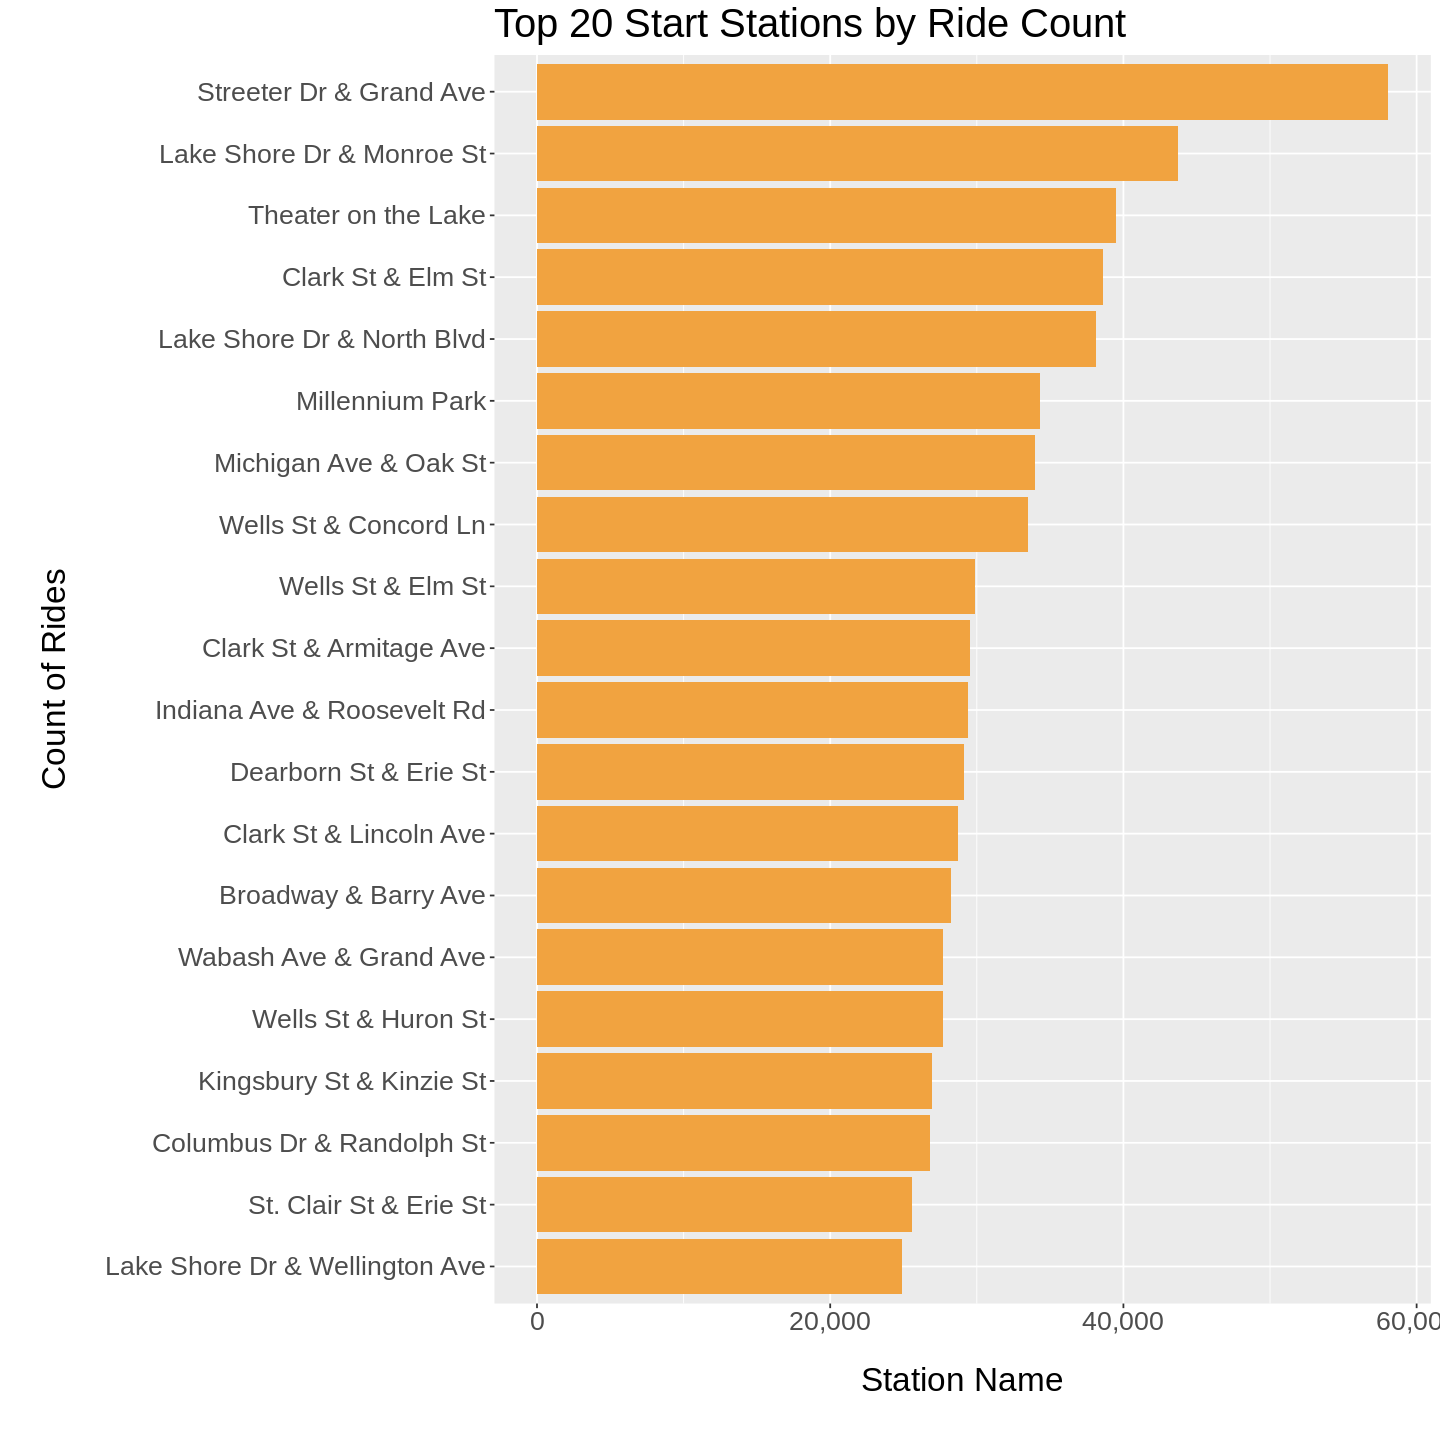

In [20]:
# Display top 20 stations by ride count

counts <- bike_rides_data %>% count(start_station_name,sort = TRUE) %>%
  top_n(20) 

counts %>% 
  ggplot(aes(x=reorder(start_station_name,n),y=n,fill="")) + geom_col() +
  coord_flip() + labs(title = "Top 20 Start Stations by Ride Count",
                      y = "Station Name",x="Count of Rides") +
  scale_y_continuous(labels = comma) +
  theme(text = element_text(size=20),
          axis.title.y = element_text(margin = margin(t = 0, r = 20, b = 0, l = 20)),
          axis.title.x = element_text(margin = margin(t = 20, r = 0, b = 20, l = 0))
          ) + 
  theme(legend.position = "none") +
  scale_fill_brewer(palette = "PuOr")
  options(repr.plot.width = 12, repr.plot.height = 12)

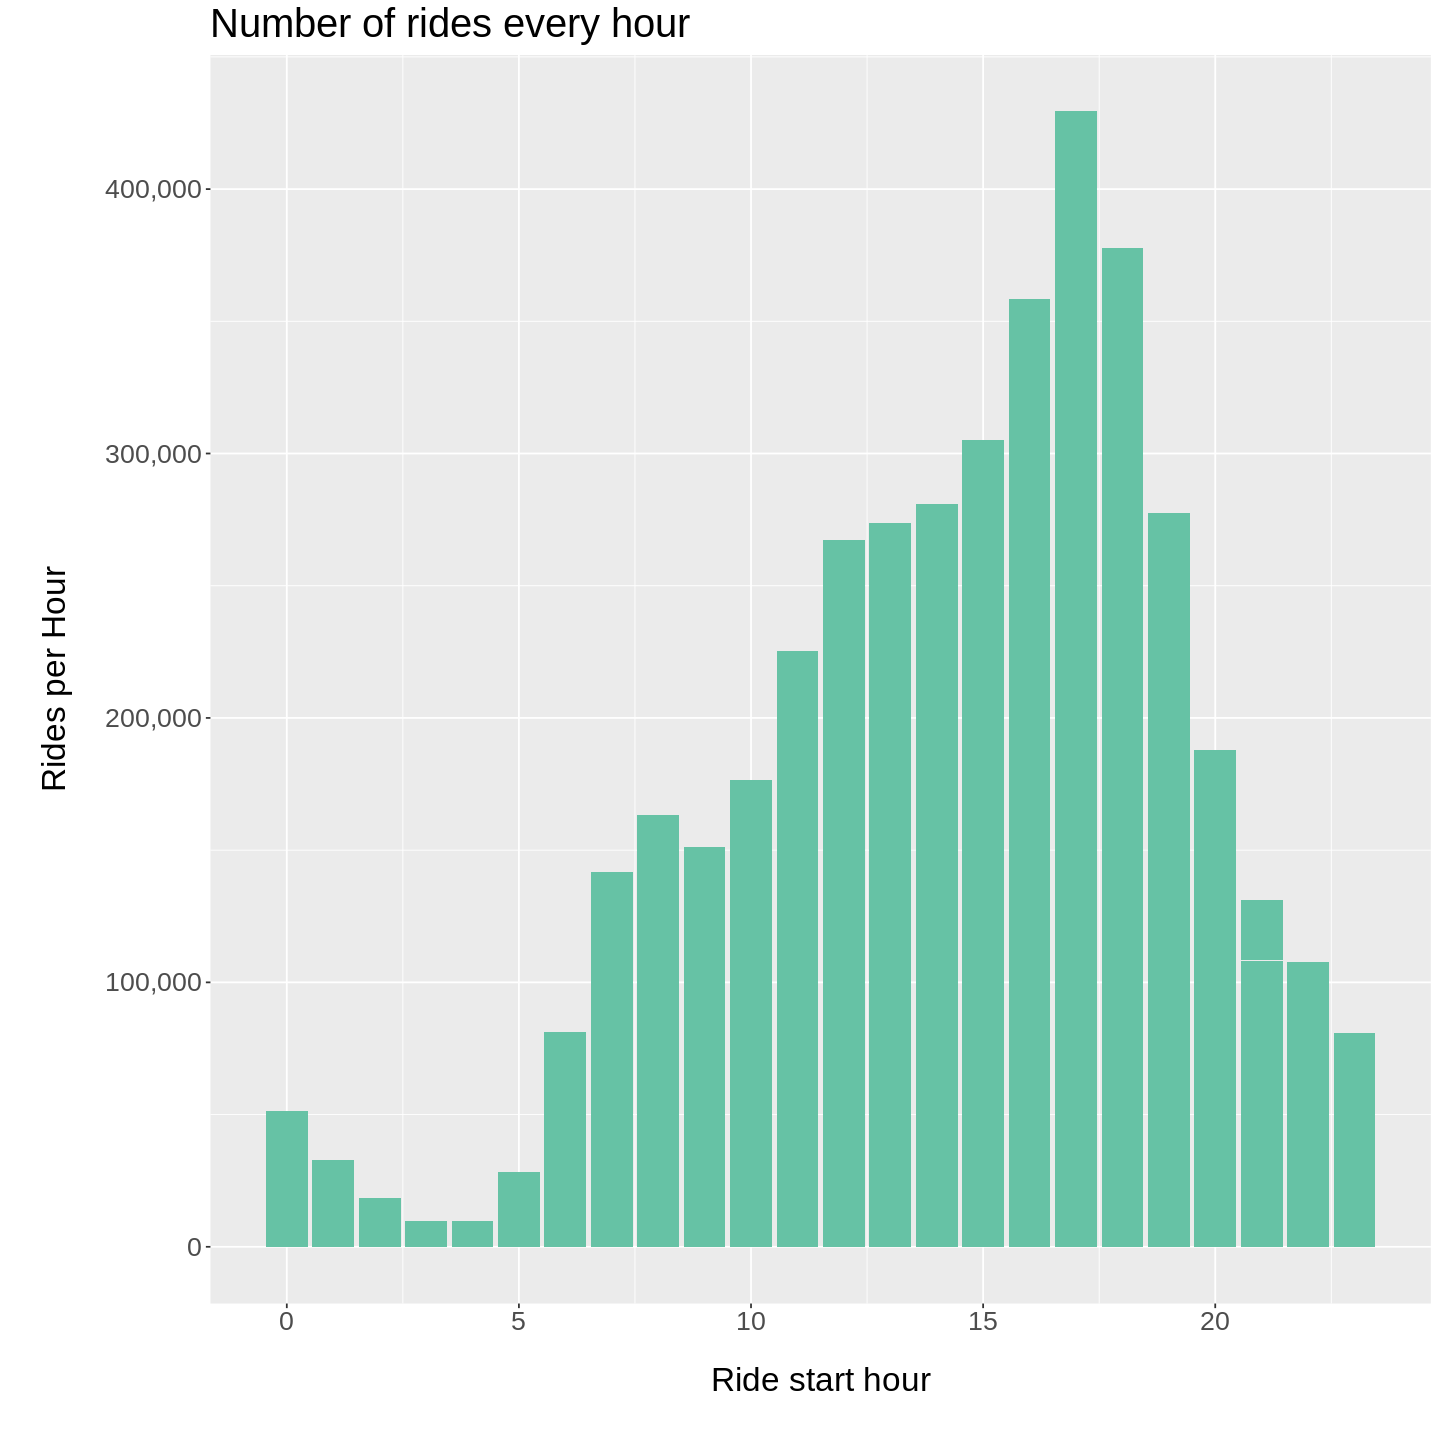

In [22]:
# Plot for Number of rides every hour

bikes_rides_data_v2 %>% 
  ggplot(aes(x=start_hour,y=Count,fill="red")) + geom_col() +
  scale_y_continuous(labels = comma) +
  labs(title = "Number of rides every hour",
        x = "Ride start hour",
        y="Rides per Hour")+ 
  theme(text = element_text(size=20),
          axis.title.y = element_text(margin = margin(t = 0, r = 20, b = 0, l = 20)),
          axis.title.x = element_text(margin = margin(t = 20, r = 0, b = 20, l = 0))
          ) + 
  theme(legend.position = "none") +
  scale_fill_brewer(palette = "Set2")
  options(repr.plot.width = 12, repr.plot.height = 12)

`summarise()` has grouped output by 'member_casual'. You can override using the `.groups` argument.



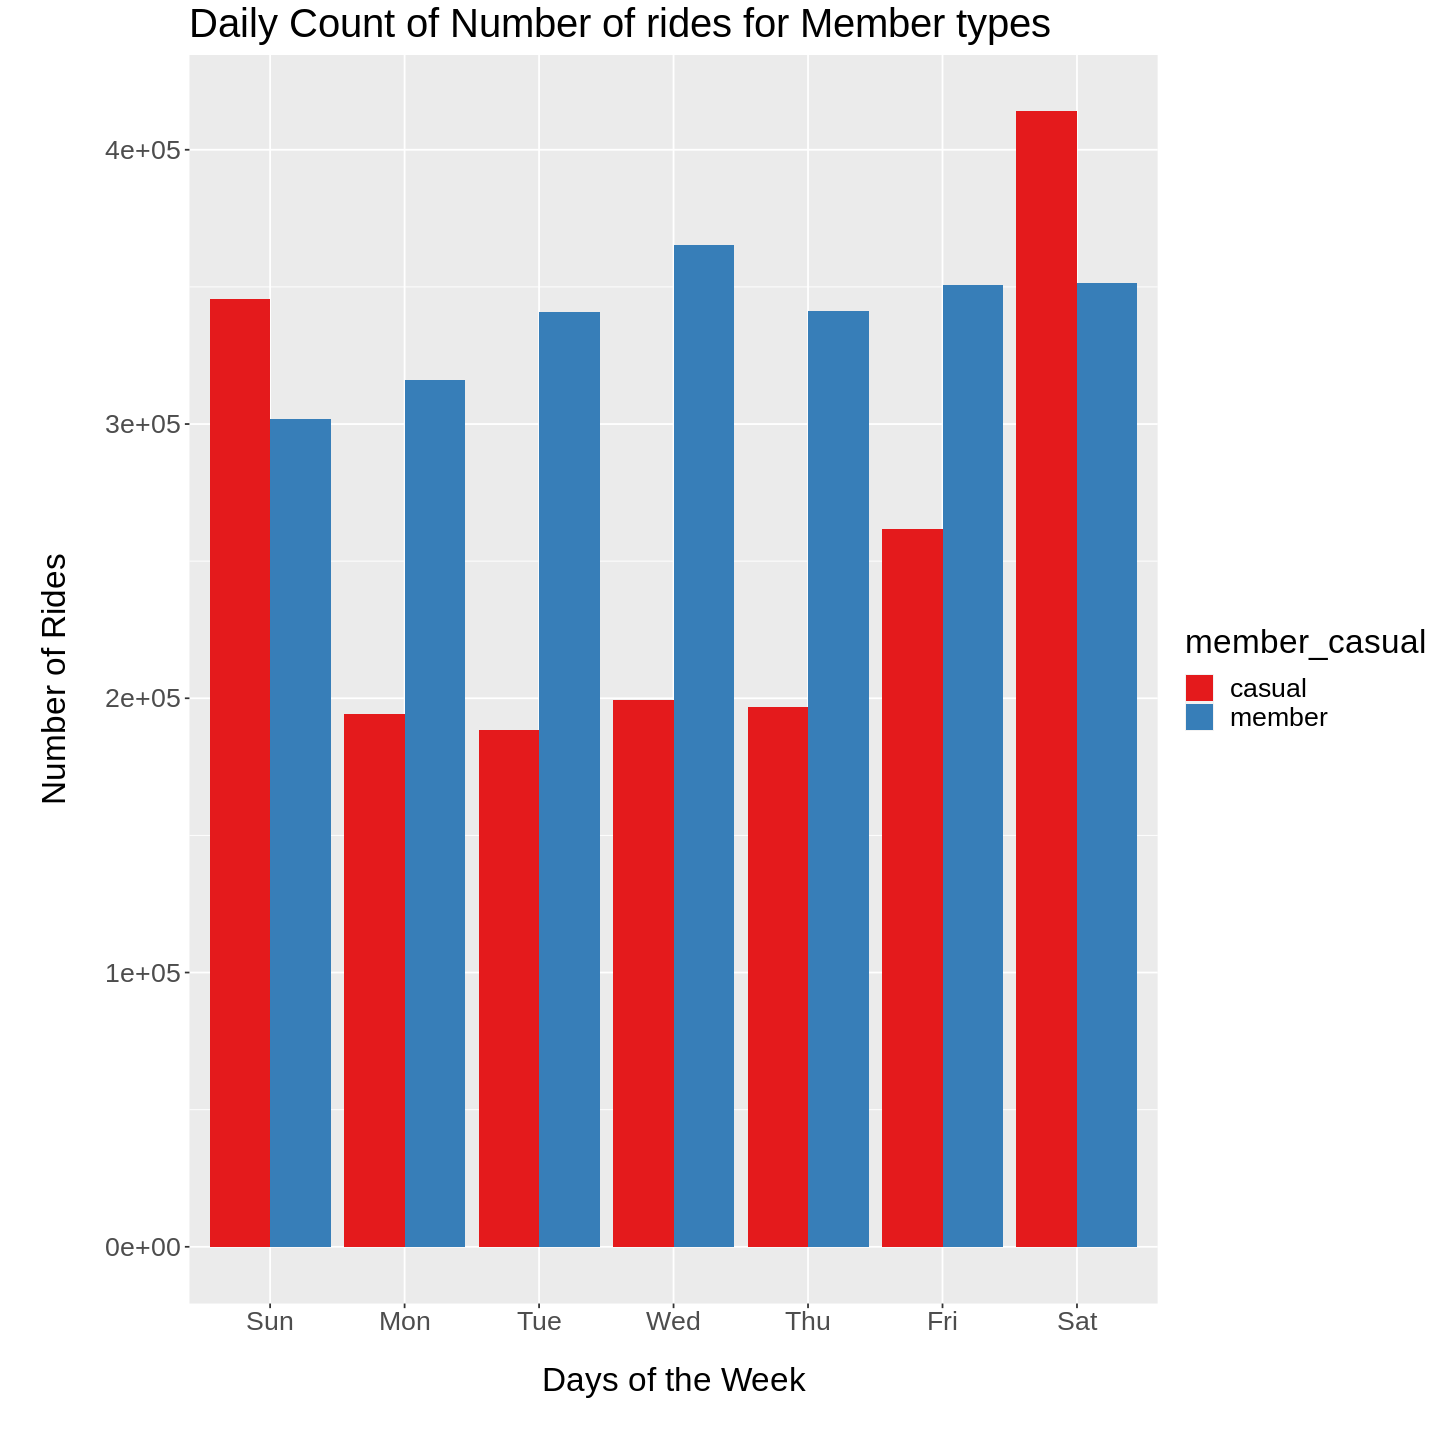

In [23]:
# Plot for daily dount of number of rides for member types

bike_rides_data %>% 
  group_by(member_casual, days_of_week) %>% 
  summarize(number_of_rides=n()) %>%
  arrange(member_casual, days_of_week)  %>% 
  ggplot(aes(x = days_of_week, y = number_of_rides,fill = member_casual)) + 
  geom_col(position = "dodge")+ 
  scale_y_continuous() +
  theme(text = element_text(size=20),
        axis.title.y = element_text(margin = margin(t = 0, r = 20, b = 0, l = 20)),
        axis.title.x = element_text(margin = margin(t = 20, r = 0, b = 20, l = 0))
        ) + 
  scale_fill_brewer(palette = "Set1") +
  labs(x="Days of the Week",y="Number of Rides",title="Daily Count of Number of rides for Member types")
  options(repr.plot.width = 10, repr.plot.height = 10)

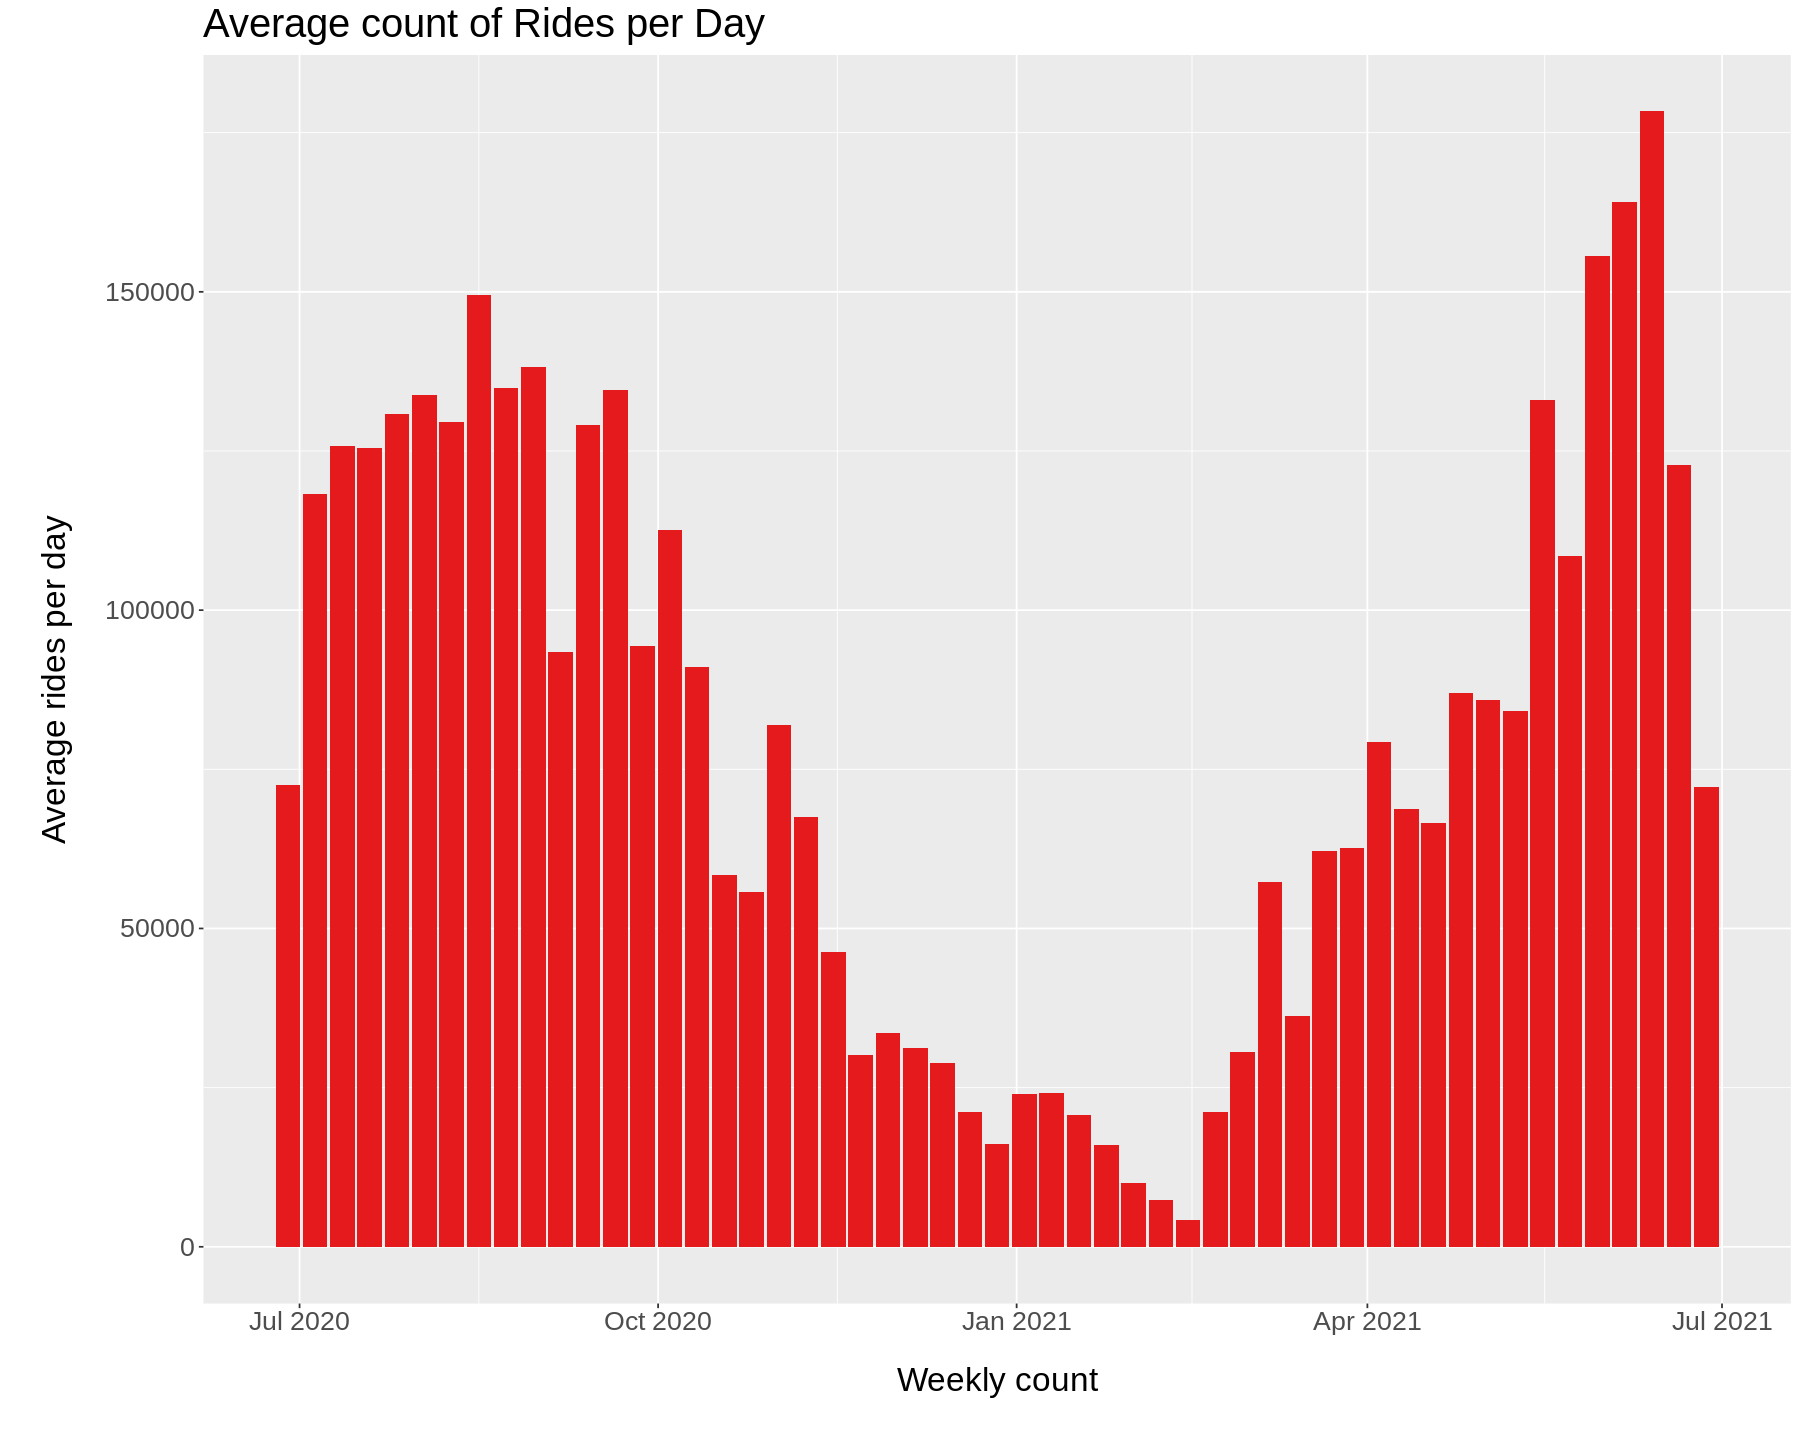

In [27]:
# Plot for average count of Rides per Day

bikes_rides_data_v2 %>% ggplot(aes(x=Weekly,y=Count,fill="")) + 
  geom_col() +
  labs(title = "Average count of Rides per Day",
      x = "Weekly count",
      y="Average rides per day")  +
  theme(text = element_text(size=20),
        axis.title.y = element_text(margin = margin(t = 0, r = 20, b = 0, l = 20)),
        axis.title.x = element_text(margin = margin(t = 20, r = 0, b = 20, l = 0))
        ) + 
  theme(legend.position = "none") +
  scale_fill_brewer(palette = "Set1")
  options(repr.plot.width = 12, repr.plot.height = 12)

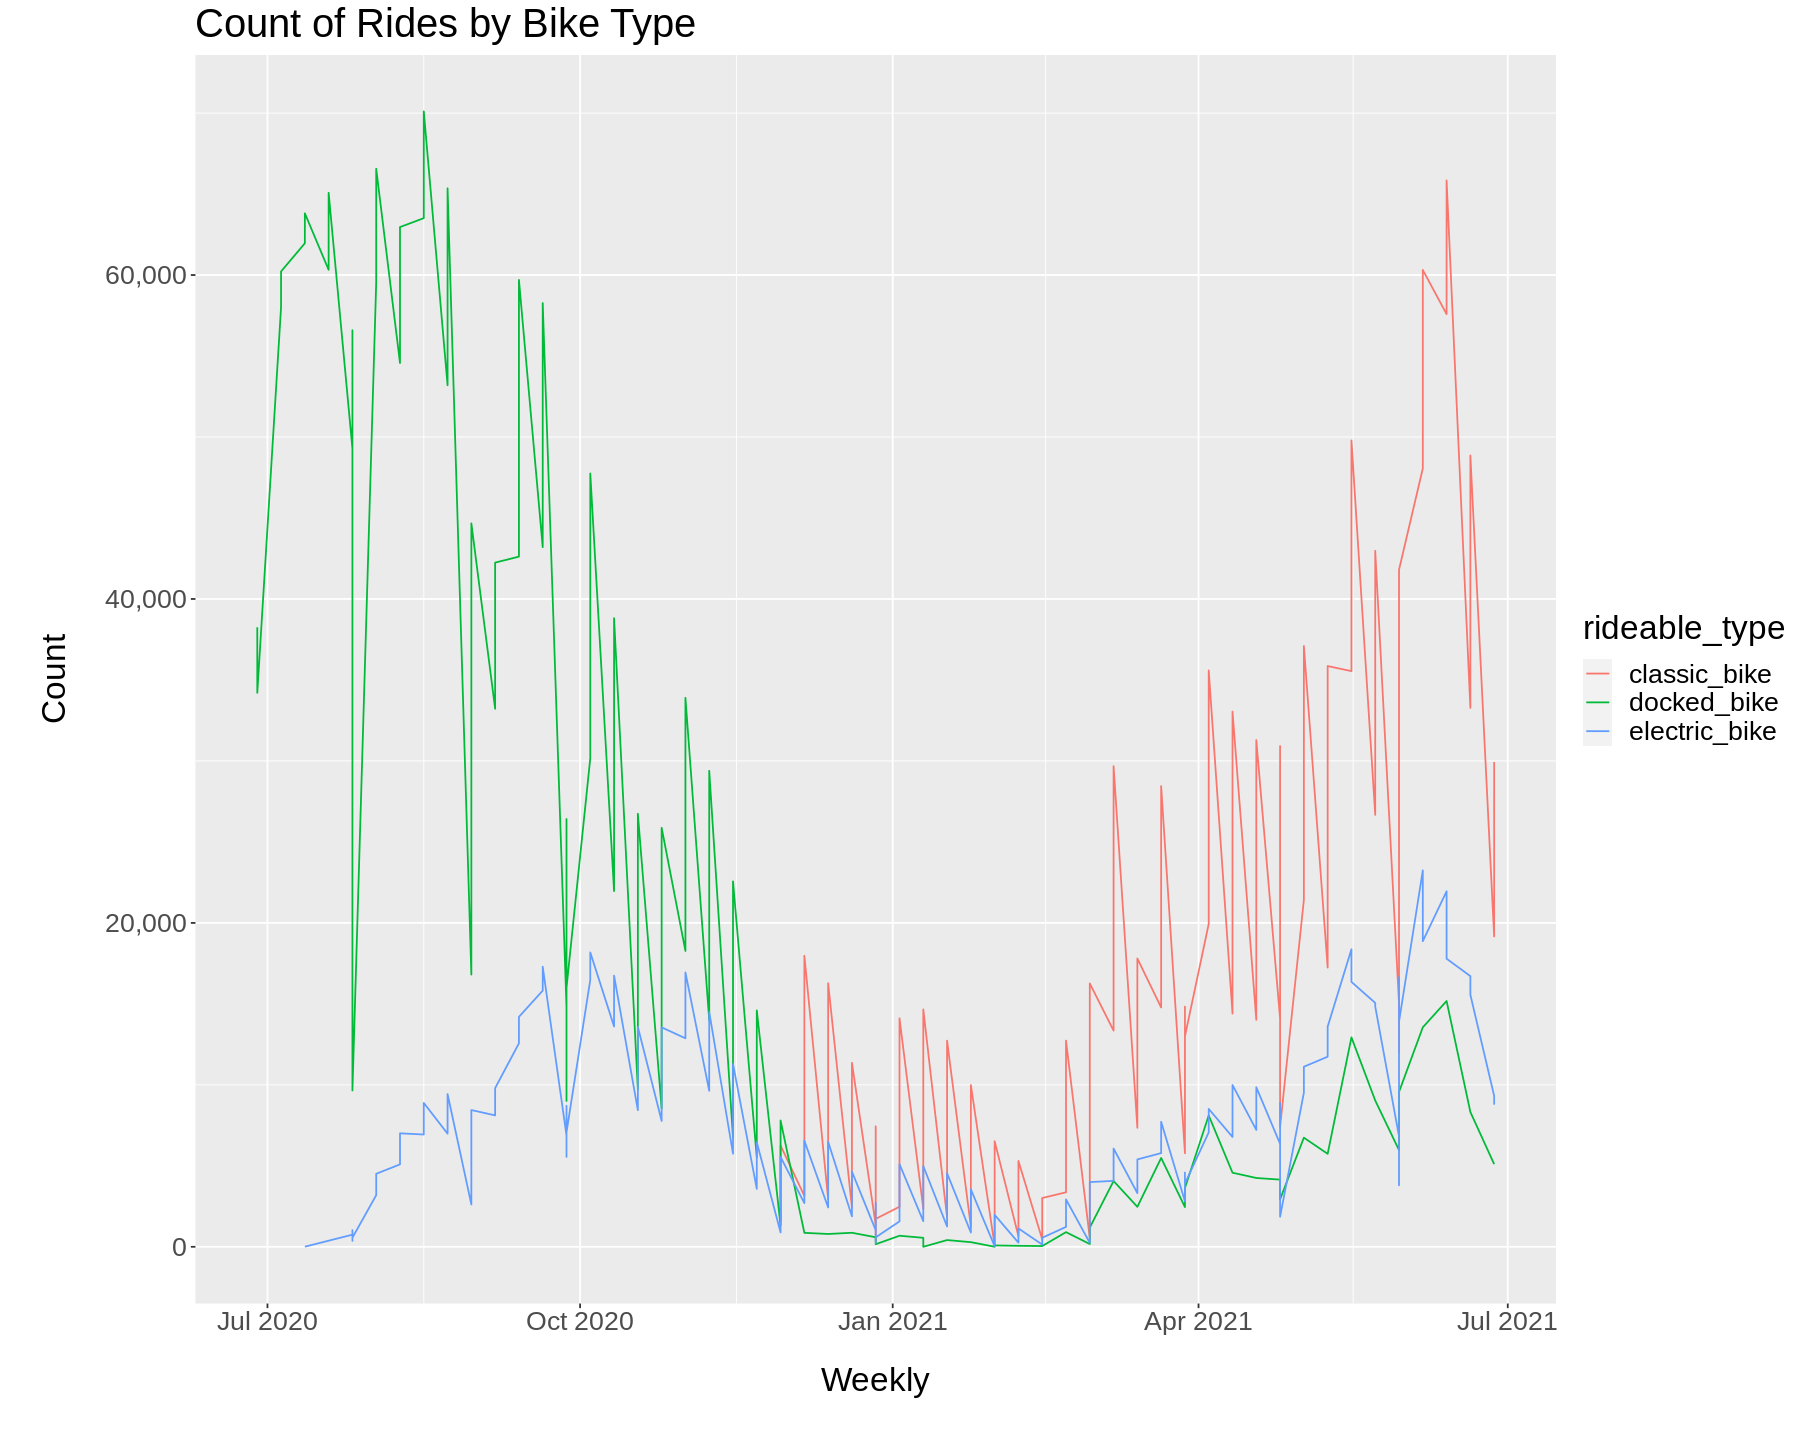

In [29]:
# Count of Rides by Bike Type

ggplot(bikestype,aes(x=Weekly,y=Count,color=rideable_type)) + geom_line() +
  scale_y_continuous(labels = comma) +
  labs(title="Count of Rides by Bike Type")+
  theme(text = element_text(size=20),
          axis.title.y = element_text(margin = margin(t = 0, r = 20, b = 0, l = 20)),
          axis.title.x = element_text(margin = margin(t = 20, r = 0, b = 20, l = 0))
          )
  options(repr.plot.width = 15, repr.plot.height = 12)

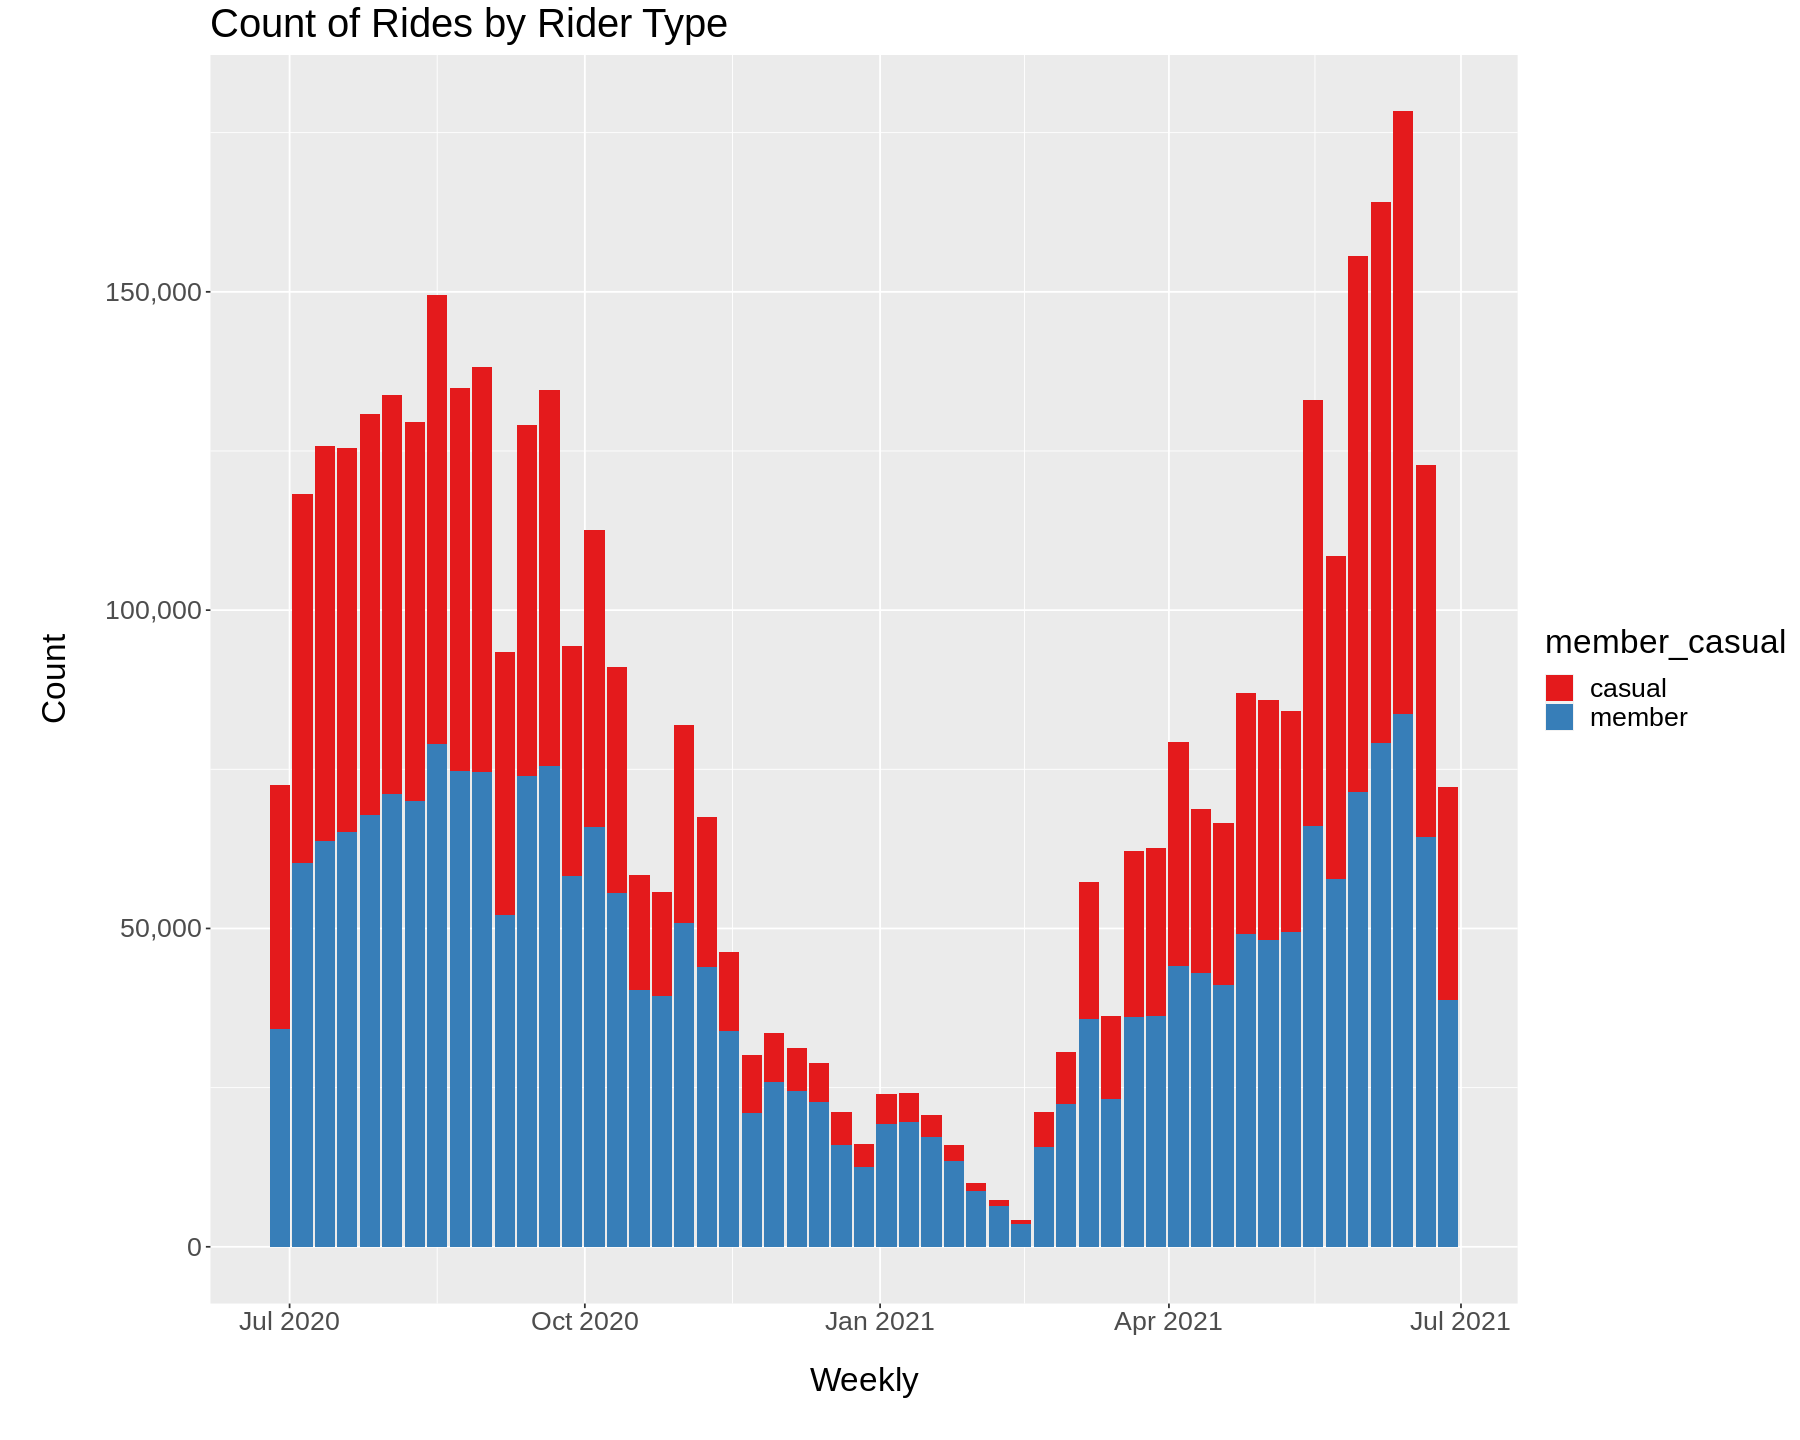

In [30]:
# Weekly plot of count of rides by rider type

ggplot(bikestype,aes(x=Weekly,y=Count,fill=member_casual)) + geom_col() +
  scale_y_continuous(labels = comma) +
  labs(title="Count of Rides by Rider Type") + 
  theme(text = element_text(size=20),
          axis.title.y = element_text(margin = margin(t = 0, r = 20, b = 0, l = 20)),
          axis.title.x = element_text(margin = margin(t = 20, r = 0, b = 20, l = 0))
          ) + 
  scale_fill_brewer(palette = "Set1")
  options(repr.plot.width = 12, repr.plot.height = 12)

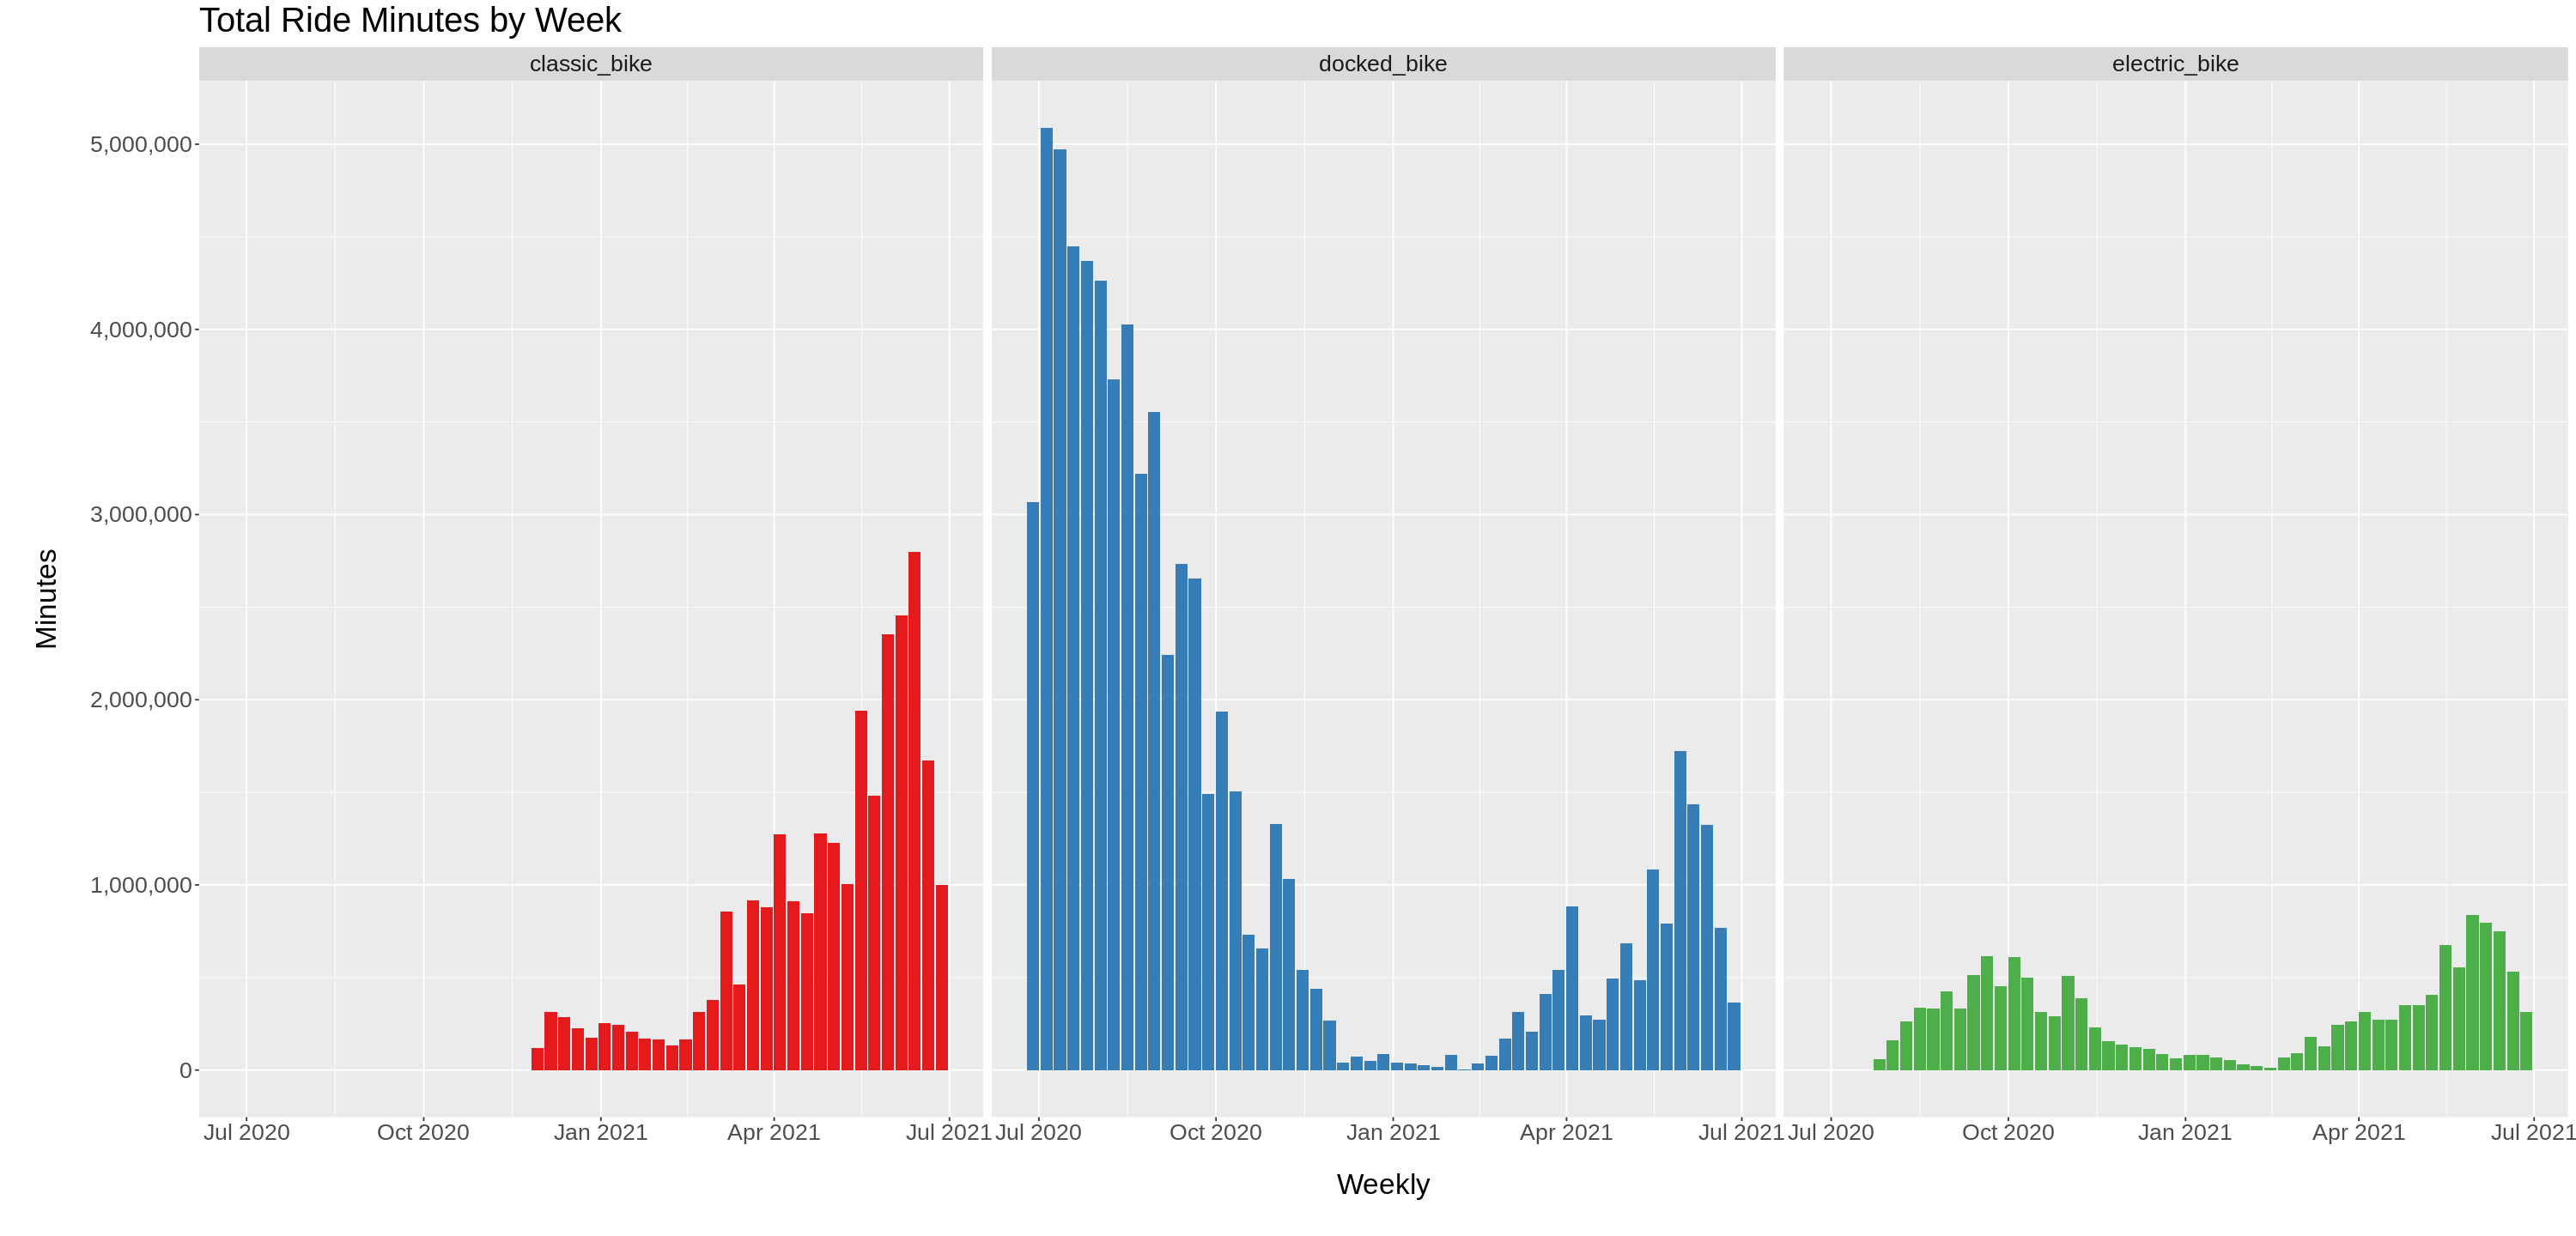

In [32]:
# Plot for Total Ride Minutes by Week

ggplot(bikestype, aes(x=Weekly,y=Minutes, fill=rideable_type)) + geom_col() +
  scale_y_continuous(labels = comma) + facet_wrap(~rideable_type) +
  labs(title="Total Ride Minutes by Week") +
  theme(text = element_text(size=20),
          axis.title.y = element_text(margin = margin(t = 0, r = 20, b = 0, l = 20)),
          axis.title.x = element_text(margin = margin(t = 20, r = 0, b = 20, l = 0))
          ) + 
  theme(legend.position = "none") +
  scale_fill_brewer(palette = "Set1")
  options(repr.plot.width = 25, repr.plot.height = 12)

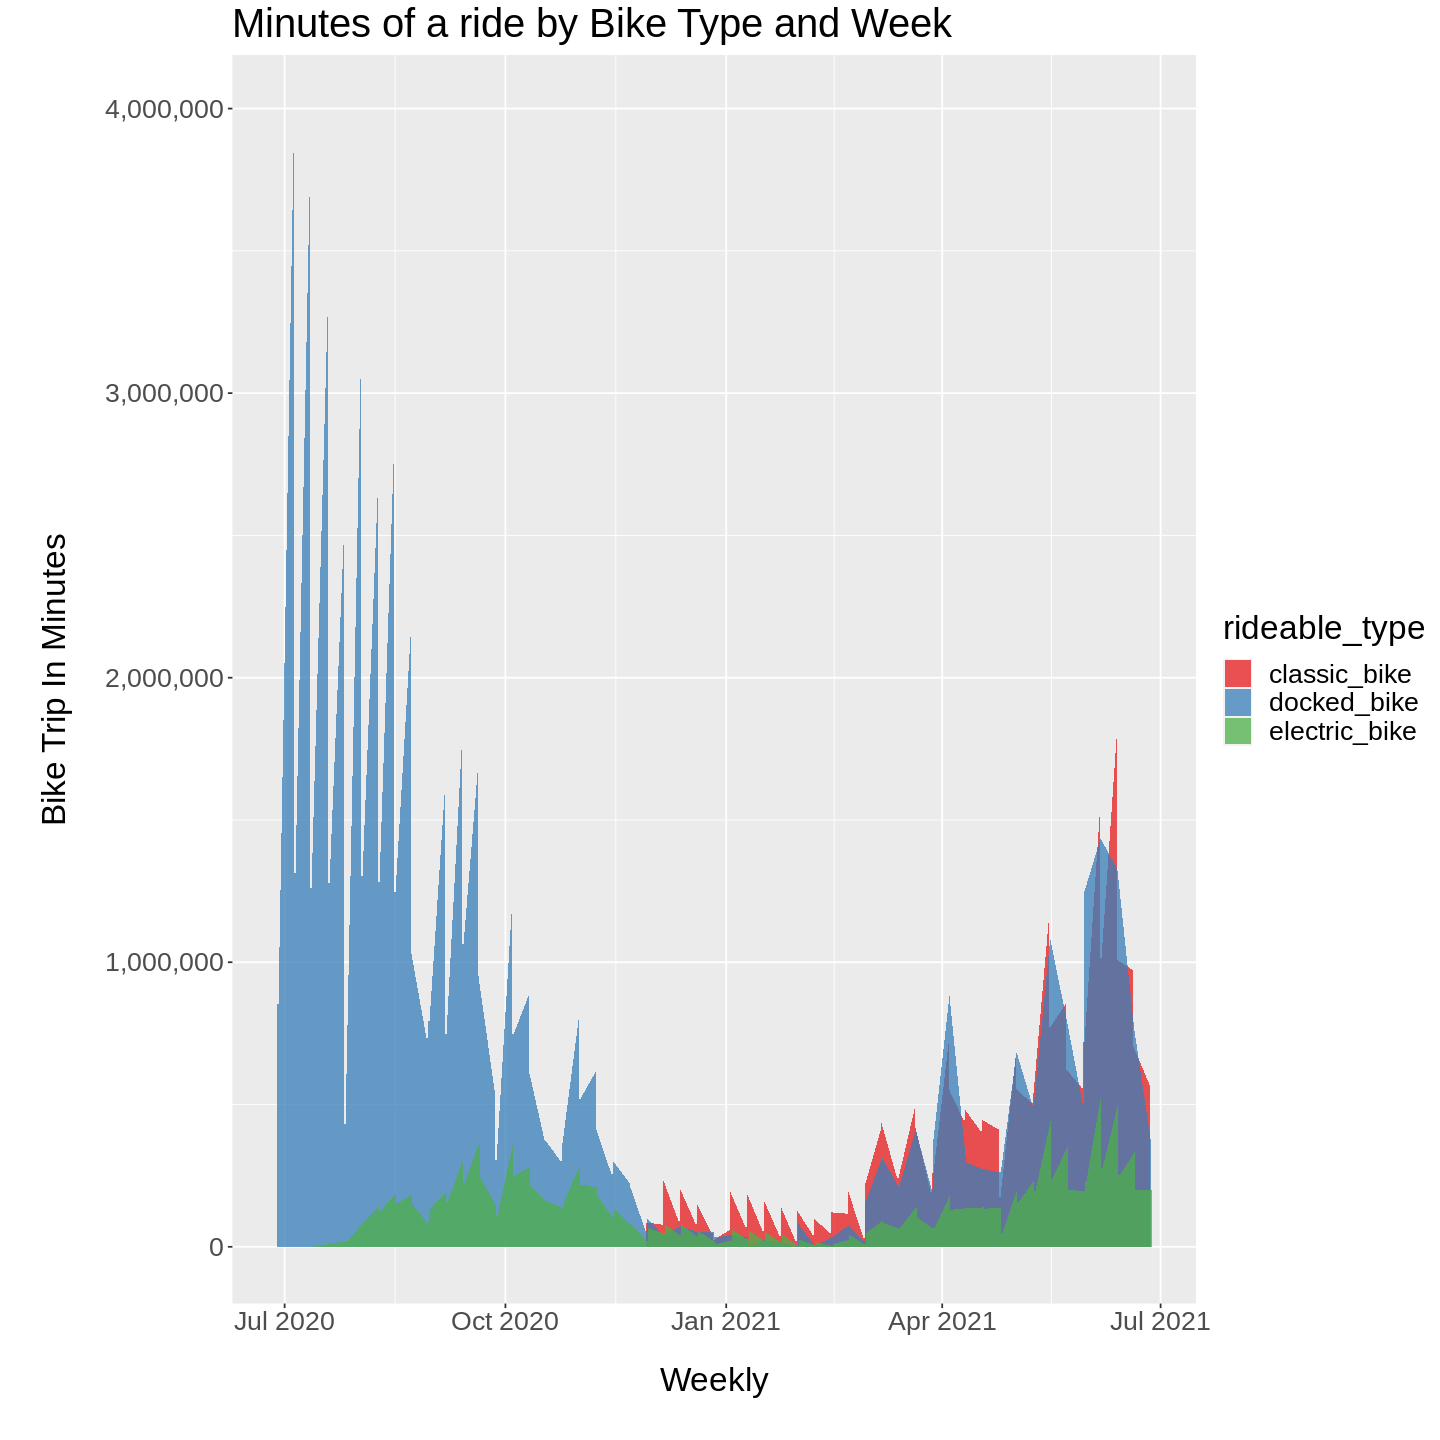

In [34]:
# Weekly plot for minutes of a ride by type of bike

ggplot(bikestype,aes(x=Weekly,y=Minutes,fill=rideable_type)) + 
  geom_area(stat = "identity", position = position_dodge(1), alpha = 0.75) +
  scale_y_continuous(labels = comma) + 
  labs(title = "Minutes of a ride by Bike Type and Week",
       y="Bike Trip In Minutes")+
  theme(text = element_text(size=20),
          axis.title.y = element_text(margin = margin(t = 0, r = 20, b = 0, l = 20)),
          axis.title.x = element_text(margin = margin(t = 20, r = 0, b = 20, l = 0))
          ) + 
  scale_fill_brewer(palette = "Set1")
  options(repr.plot.width = 12, repr.plot.height = 12)

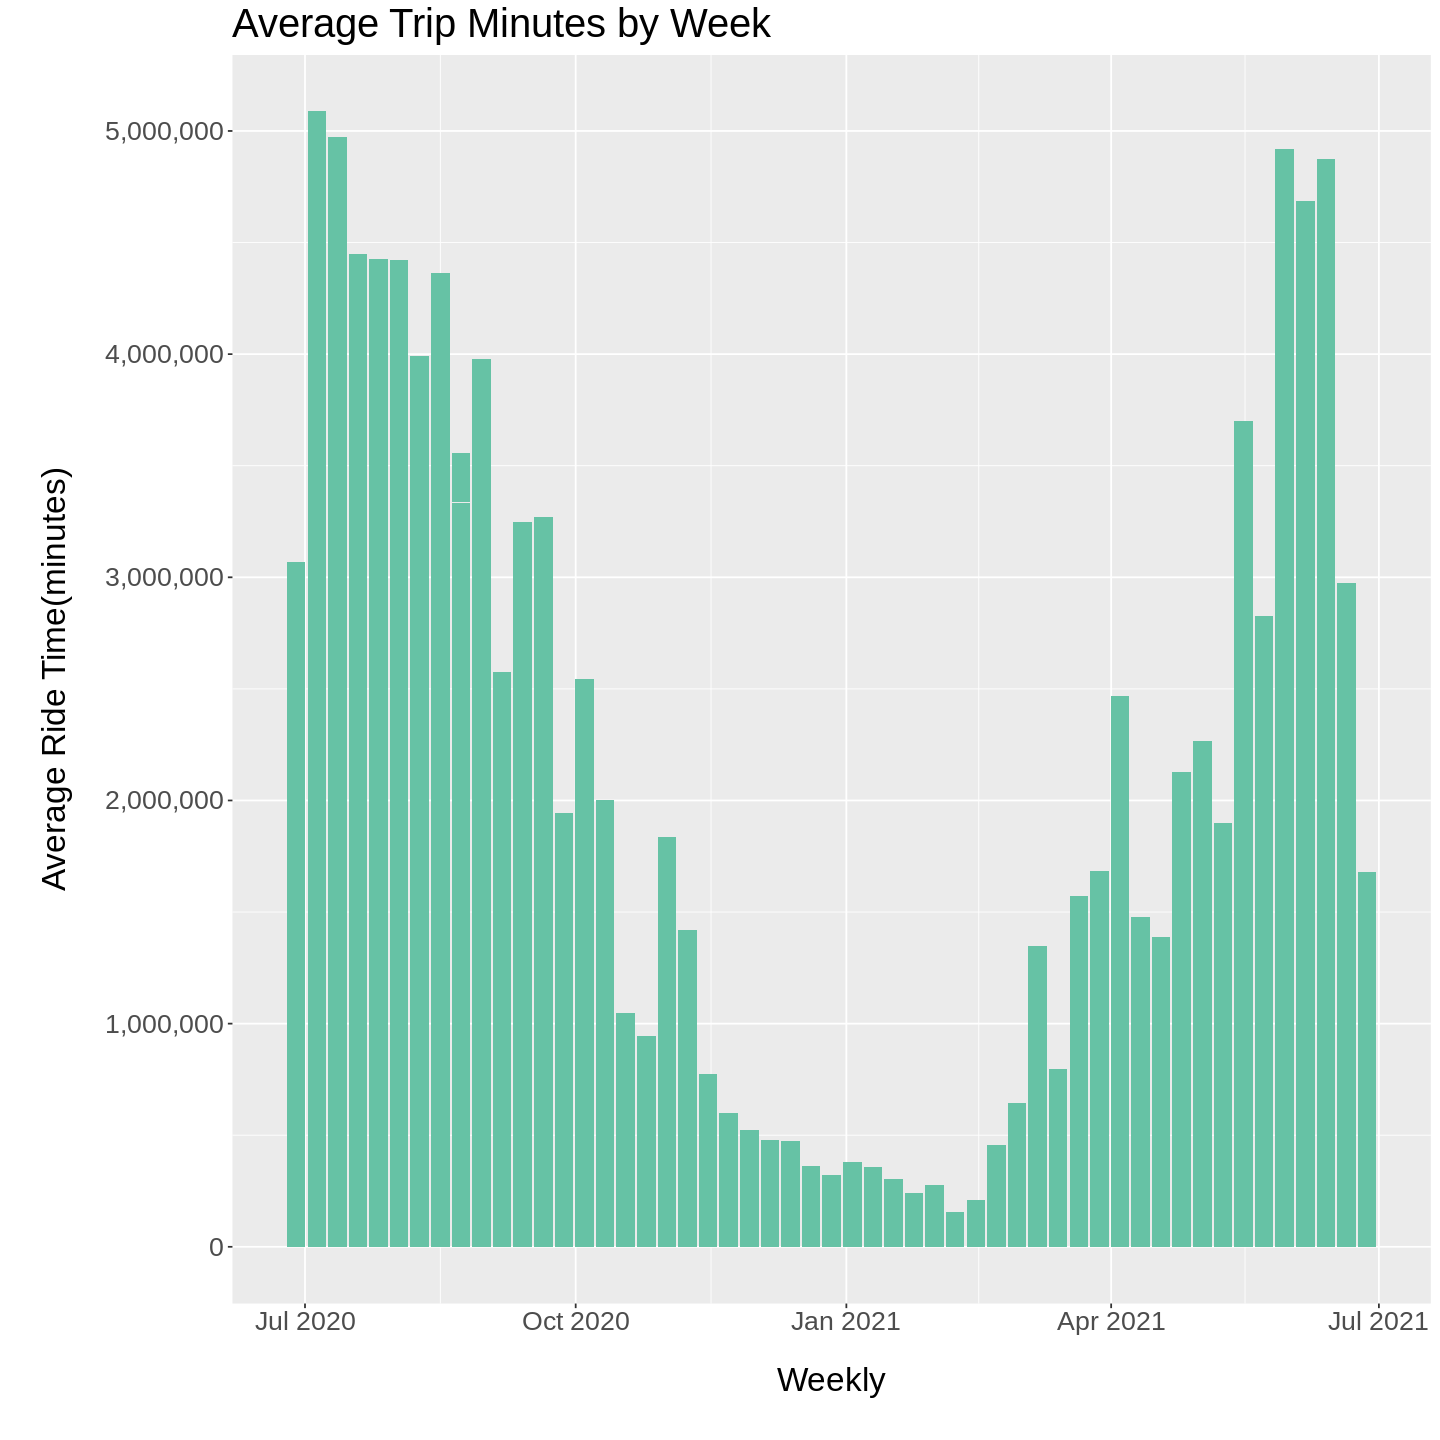

In [36]:
# Plot for average trip duration on weekly basis

ggplot(bikes_rides_data_v2,aes(x=Weekly,y=Mean,, fill="")) + geom_col() +
  labs(title="Average Trip Minutes by Week", y ="Average Ride Time(minutes)") +
  scale_y_continuous(labels = comma) + 
  theme(text = element_text(size=20),
          axis.title.y = element_text(margin = margin(t = 0, r = 20, b = 0, l = 20)),
          axis.title.x = element_text(margin = margin(t = 20, r = 0, b = 20, l = 0))
          ) + 
    theme(legend.position = "none") +
  scale_fill_brewer(palette = "Set2")
  options(repr.plot.width = 12, repr.plot.height = 12)

Don't know how to automatically pick scale for object of type difftime. Defaulting to continuous.



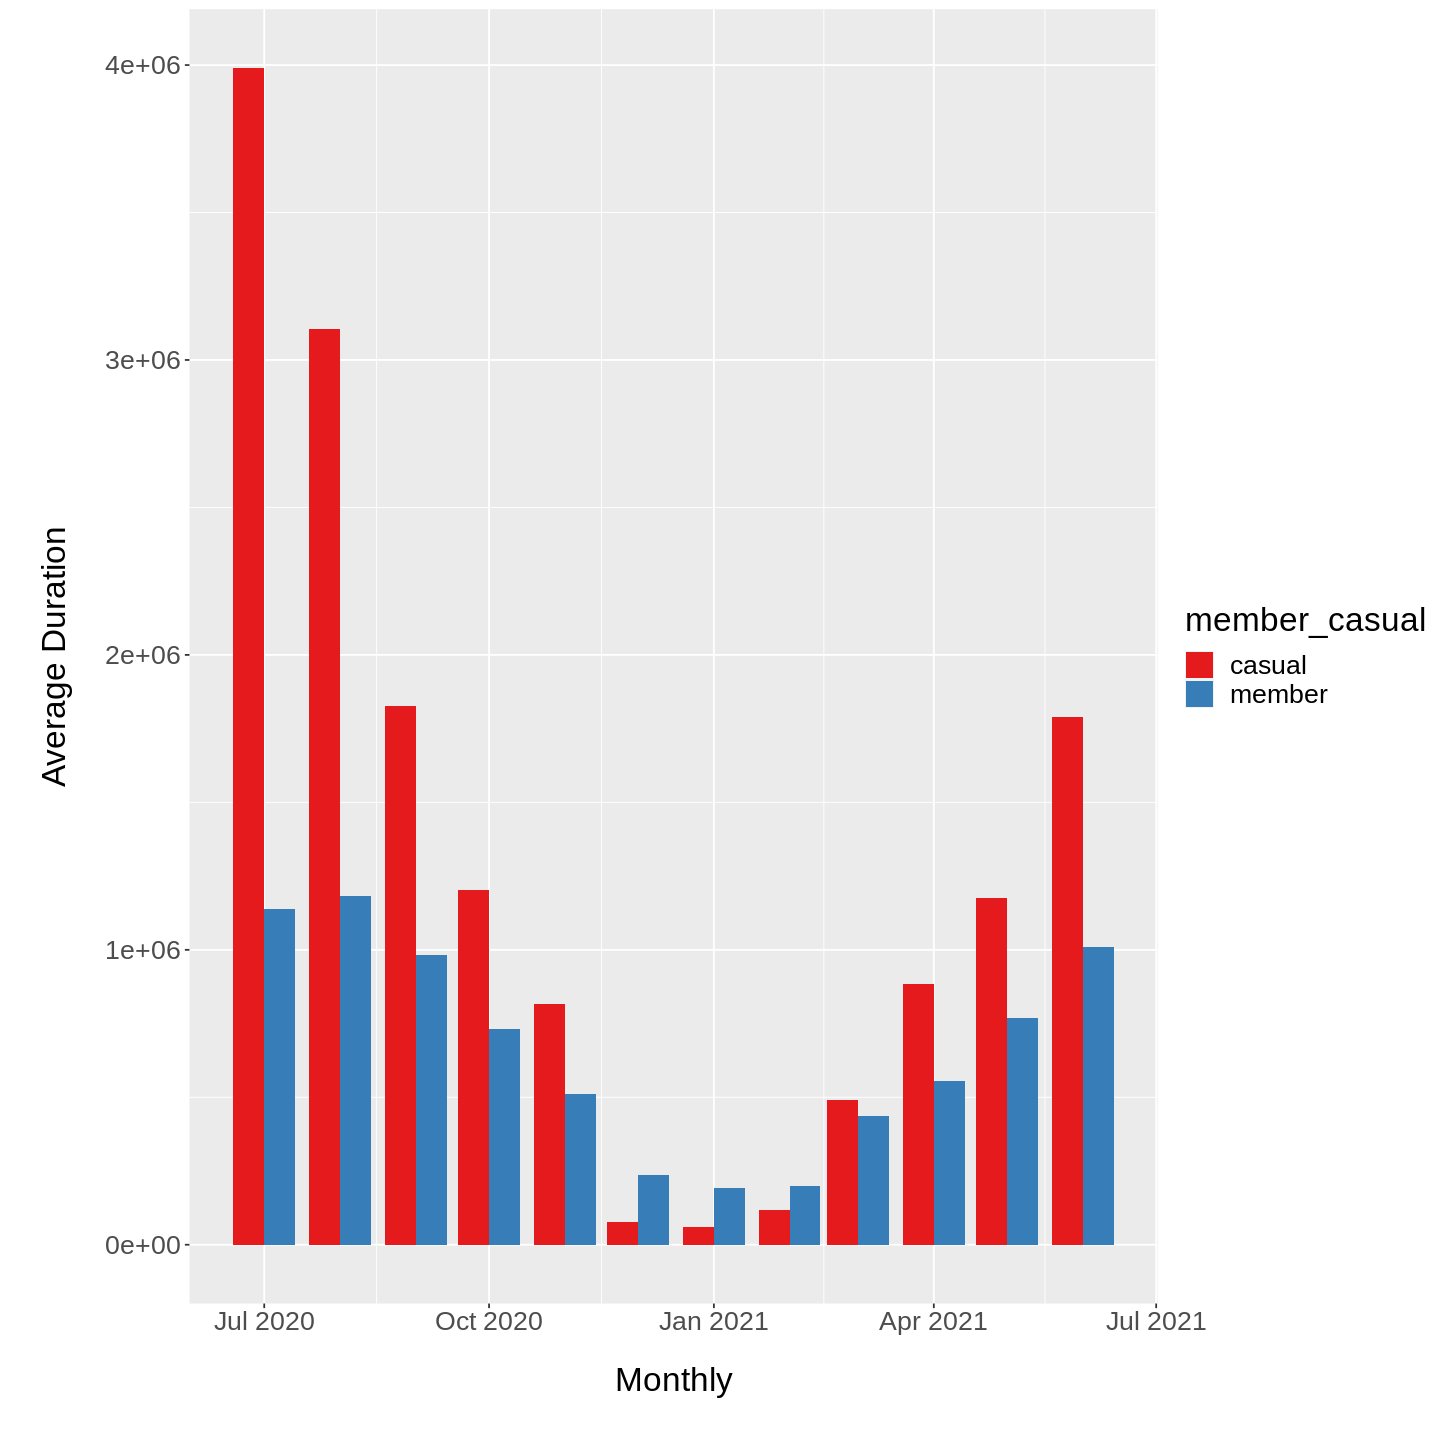

In [38]:
# Plot for Average duration weekly

bikestype %>% 
  group_by(member_casual, Monthly) %>% 
  arrange(member_casual, Monthly) %>%
  ggplot(aes(x = Monthly, y = Mean,fill = member_casual)) + 
  geom_col(position = "dodge") +
    theme(text = element_text(size=20),
          axis.title.y = element_text(margin = margin(t = 0, r = 20, b = 0, l = 20)),
          axis.title.x = element_text(margin = margin(t = 20, r = 0, b = 20, l = 0))
          ) + 
  scale_fill_brewer(palette = "Set1") +          
  labs(y="Average Duration",x="Monthly")
  options(repr.plot.width = 12, repr.plot.height = 12)

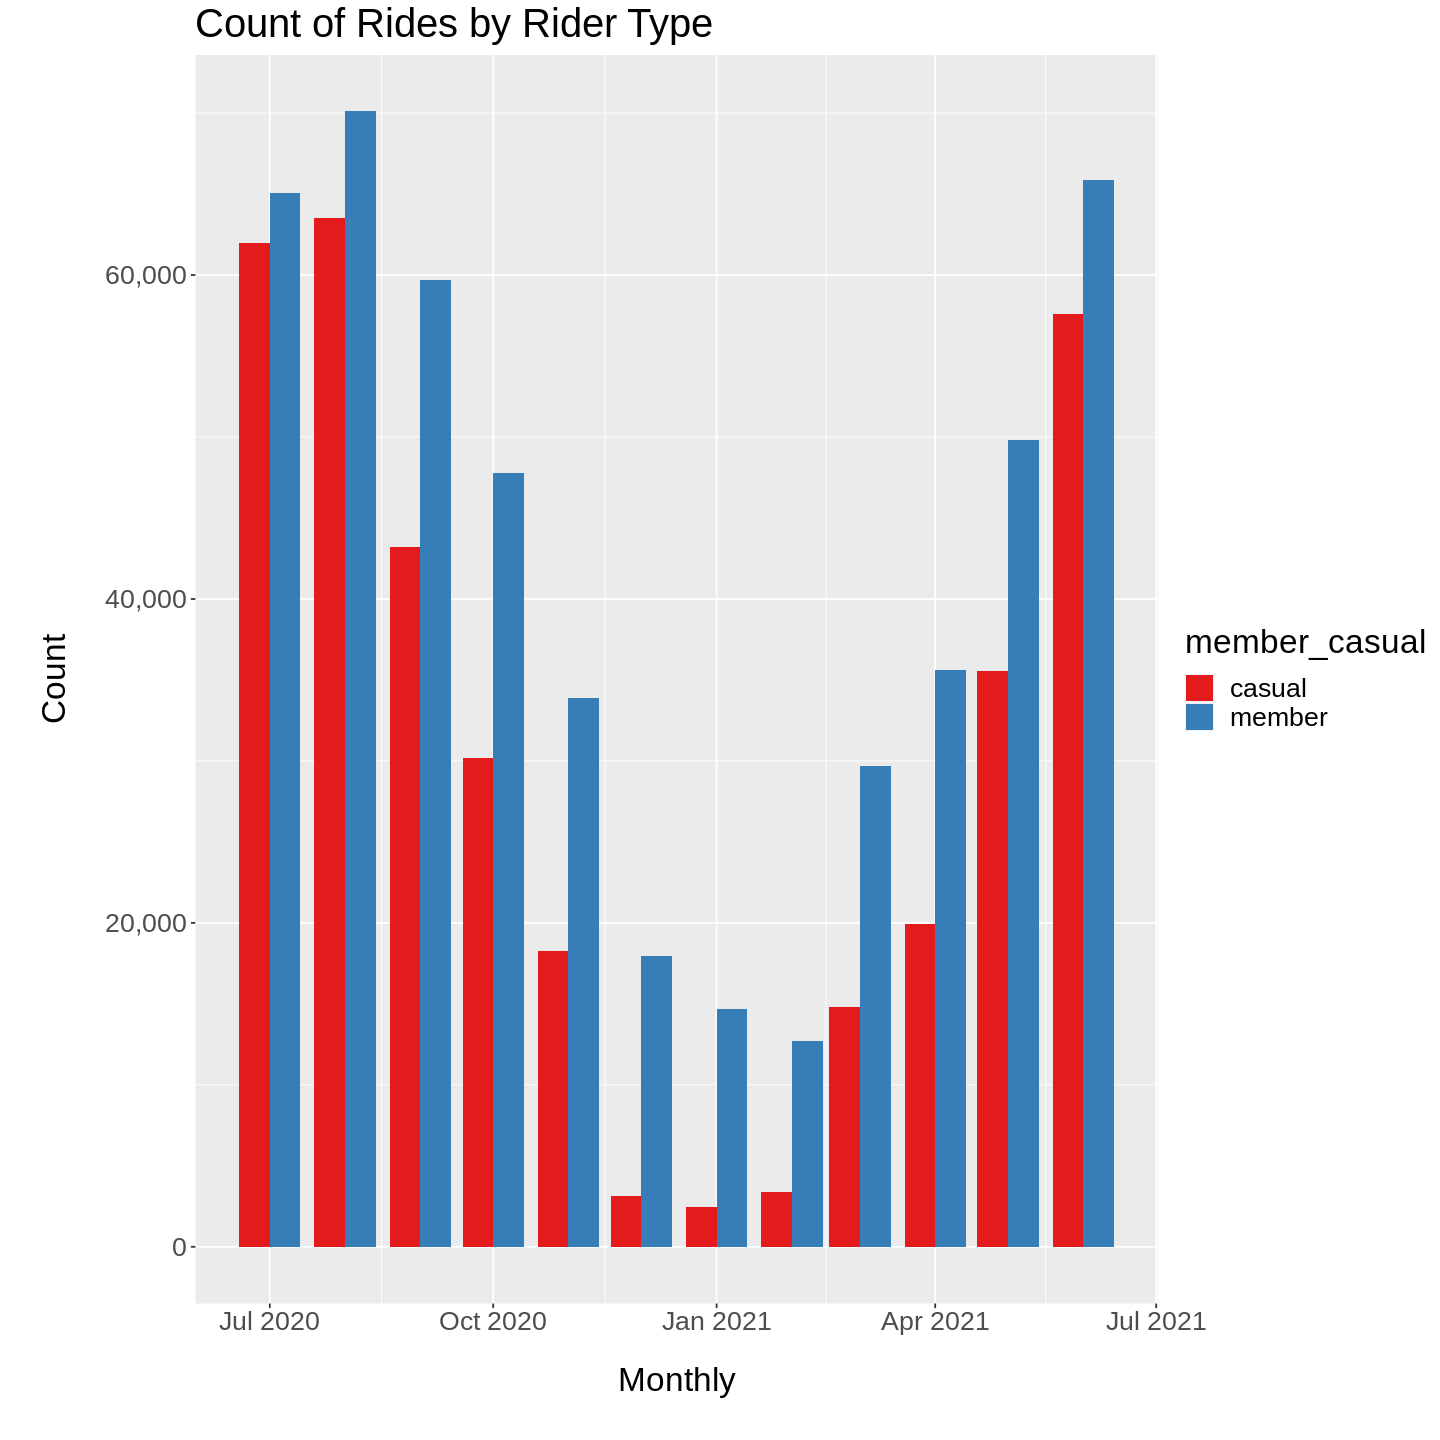

In [39]:
# Monthly plot of count of rides by rider type

ggplot(bikestype,aes(x=Monthly,y=Count,fill=member_casual)) + geom_col(position = "dodge") +
  scale_y_continuous(labels = comma) +
  labs(title="Count of Rides by Rider Type") + 
  theme(text = element_text(size=20),
          axis.title.y = element_text(margin = margin(t = 0, r = 20, b = 0, l = 20)),
          axis.title.x = element_text(margin = margin(t = 20, r = 0, b = 20, l = 0))
          ) + 
  scale_fill_brewer(palette = "Set1")
  options(repr.plot.width = 12, repr.plot.height = 12)

## Act

### Key Findings:
- Our casual customers take the most rides of the weekends. Conversely, our members customers take the most rides during the week.
- On average, our members take shorter rides than our casual customers.
- Company sees more customers in the months of July, August and September while less customers in December, February, January.

---------------------------------------------------------------

### Recommendations
- Advertise how a membership can save money for those customers who take longer rides.
- Target casual customers who rent a bike for leisure on their weekends.
- Introduce referral system where existing members can refer their friends to buy membership in discounted prices preferrably on weekends.
- Create a large summer campaign when more people are likely to rent a bike.